/Users/lichen/anaconda3/lib/python3.6/site-packages/sklearn/cluster/hierarchical.py:480: UserWarning: the number of connected components of the connectivity matrix is 27 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)
/Users/lichen/anaconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


<Figure size 576x576 with 0 Axes>

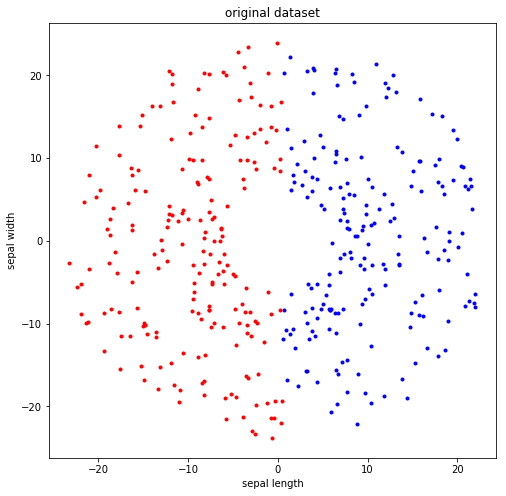

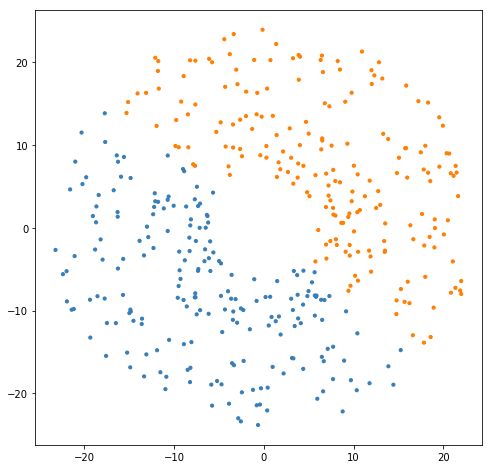

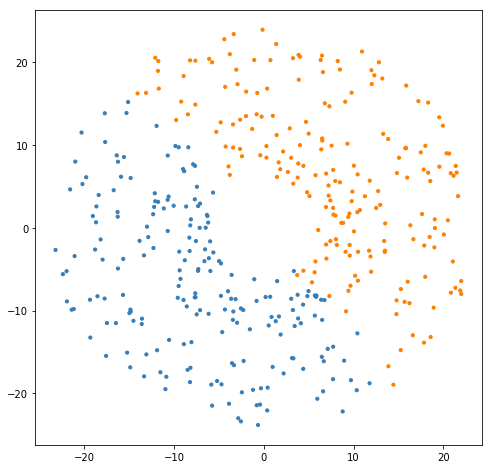

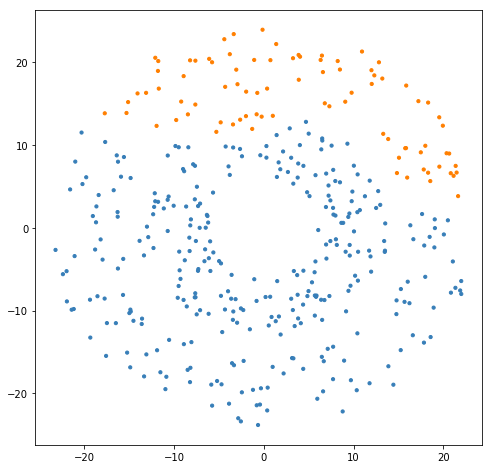

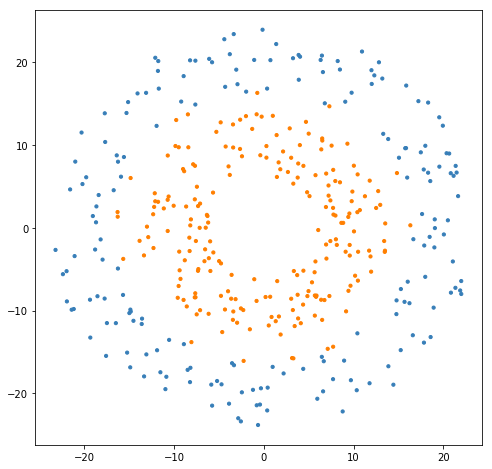

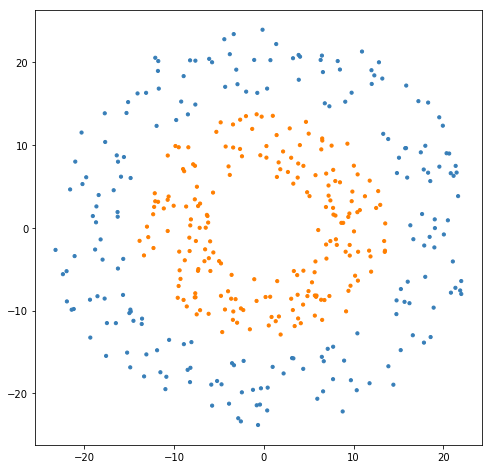

In [137]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import kneighbors_graph
from itertools import cycle, islice
#from sklearn.cluster import KMeans
from sklearn import cluster, datasets, mixture

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))


# default_base = {'quantile': .3,
#                 'eps': .3,
#                 'damping': .9,
#                 'preference': -200,
#                 'n_neighbors': 10,
#                 'n_clusters': 3}
# datasets = [
#     (noisy_circles, {'damping': .77, 'preference': -240,
#                      'quantile': .2, 'n_clusters': 2}),
#     (noisy_moons, {'damping': .75, 'preference': -220, 'n_clusters': 2}),
#     (varied, {'eps': .18, 'n_neighbors': 2}),
#     (aniso, {'eps': .15, 'n_neighbors': 2}),
#     (blobs, {}),
#     (no_structure, {})]

def originalDatashow(dataSet):
    #绘制原始的样本点
    num,dim=np.shape(dataSet)
    #marksamples=['or'] #样本图形标记
    for i in range(num):
        if dataSet.iat[i,0]< 0.5:
            marksamples=['or']
        else:
            marksamples=['ob']
        plt.plot(dataSet.iat[i,0],dataSet.iat[i,1],marksamples[0],markersize=3)
    plt.title('original dataset')
    plt.xlabel('sepal length')
    plt.ylabel('sepal width')
    kmeans = KMeans(n_clusters=2, random_state=0)

    
#names = ['x','y','class']
dataset = pd.read_csv("dataset_circles.csv",header=None,index_col=None)


#print(type(dataset))
dataset.head()
dataSet = dataset.values
# print(type(dataSet))

# X = dataSet[:,0].flatten()
# Y = dataSet[:,1].flatten()
# Z = X**2 + Y**2

plt.figure(1,figsize= (8,8))
#plt.scatter(dataSet[:,0], dataSet[:, 1], s=10, color=colors[bool(dataSet[:, 2])])
plt.figure(2,figsize= (8,8))
originalDatashow(dataset)
# params = default_base.copy()
# params.update(algo_params)
#two_means = cluster.MiniBatchKMeans(n_clusters=3)
# ward = cluster.AgglomerativeClustering(
#     n_clusters=params['n_clusters'], linkage='ward',
#     connectivity=connectivity)
y_pred = cluster.KMeans(n_clusters=2).fit_predict(dataSet[:,:2])
plt.figure(3,figsize= (8,8))
plt.scatter(dataSet[:, 0], dataSet[:, 1], s=10, color=colors[y_pred])

y_pred = cluster.SpectralClustering(
        n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(dataSet[:,:2])
plt.figure(4,figsize= (8,8))
plt.scatter(dataSet[:, 0], dataSet[:, 1], s=10, color=colors[y_pred])


connectivity = kneighbors_graph(
        dataSet[:,:2], n_neighbors= 2 , include_self=False)
    # make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)
y_pred = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=2, connectivity=connectivity).fit_predict(dataSet[:,:2])

plt.figure(5,figsize= (8,8))
plt.scatter(dataSet[:, 0], dataSet[:, 1], s=10, color=colors[y_pred])

#
X = dataSet[:, 0]**2 + dataSet[:, 1]**2

y_pred = cluster.KMeans(n_clusters=2).fit_predict(X.reshape(-1,1))
plt.figure(6,figsize= (8,8))
plt.scatter(dataSet[:, 0], dataSet[:, 1], s=10, color=colors[y_pred])

spectral = cluster.SpectralClustering(
        n_clusters=2, eigen_solver='arpack',
        affinity="nearest_neighbors").fit_predict(X.reshape(-1,1))
plt.figure(7,figsize= (8,8))
plt.scatter(dataSet[:, 0], dataSet[:, 1], s=10, color=colors[spectral])

